# **Exercise 7.03**
# **Building a Convolutional Neural Network**

With our next exercise, we will be building a convolutional base layer.  Here we will utilize everything that we’ve learned up to this point. We will be working with a more advanced datset than one like MNIST. In this dataset our images aren’t centered. They target is seen at all angles and at different positions in the frame. This is the Humans vs Horses dataset. We will continue to build on this foundation throughout the chapter, adding to it piece by piece. 
Our main goal for this exercise is to creat a convolutional base layer for our model. 



**1. Import libraries.**

In [0]:
import os
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import signal

**2. Check the TensorFlow version**

In [0]:
# !pip install -q tensorflow-gpu==2.0.0-beta1

print(tf.__version__)

2.2.0


**3. Lets get the training dataset.**

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip


local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')

zip_ref.close()

--2020-05-13 21:35:16--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 2a00:1450:4013:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   133MB/s    in 1.1s    

2020-05-13 21:35:17 (133 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



**4. Now, we'll grab our validation set**

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')

zip_ref.close()

--2020-05-13 21:35:24--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 2a00:1450:4013:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  41.0MB/s    in 0.3s    

2020-05-13 21:35:24 (41.0 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



**5. Check our class folders**

In [0]:
print(len(os.listdir('/tmp/horse-or-human/horses')))
print(len(os.listdir('/tmp/horse-or-human/humans')))


500
527


**6. Check our directories**

In [0]:
hmn_trn_dir = os.path.join('/tmp/horse-or-human/humans') # Directory with our training human pictures
hrs_trn_dir = os.path.join('/tmp/horse-or-human/horses') # Directory with our training horse picture

hmn_val_dir = os.path.join('/tmp/validation-horse-or-human/humans') # Directory with our training human pictures
hrs_val_dir = os.path.join('/tmp/validation-horse-or-human/horses') # Directory with our training horse pictures

**7. Check file names.**

In [0]:
hmn_trn_names = os.listdir(hmn_trn_dir)
print(hmn_trn_names[:5])

hrs_trn_names = os.listdir(hrs_trn_dir)
print(hrs_trn_names[:5])

print(hmn_val_dir[:5])
print(hrs_val_dir[:5])


['human05-06.png', 'human01-21.png', 'human14-26.png', 'human04-07.png', 'human12-26.png']
['horse09-8.png', 'horse23-9.png', 'horse34-9.png', 'horse07-5.png', 'horse39-4.png']
/tmp/
/tmp/


**8. Let's take a look at how many training images we have for each.**

In [0]:
print('Human training total images = ', len(os.listdir(hmn_trn_dir)))

print('Horse training total images = ', len(os.listdir(hrs_trn_dir)))

Human training total images =  527
Horse training total images =  500


**9. Let's look at the actual images.**

In [0]:
%matplotlib inline

nrows = 4  
ncols = 4
pic_index = 0 


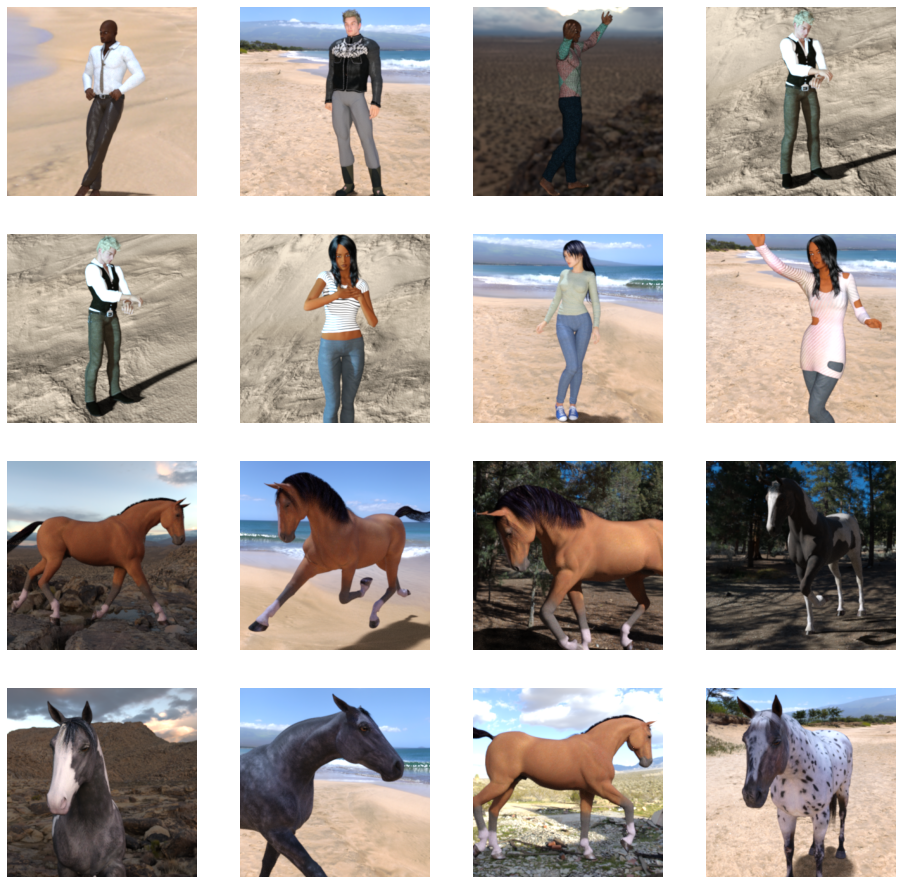

In [0]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
hrs_image_batch = [os.path.join(hrs_trn_dir, fname) 
                for fname in hrs_trn_names[pic_index-8:pic_index]]
hmn_image_batch = [os.path.join(hmn_trn_dir, fname) 
                for fname in hmn_trn_names[pic_index-8:pic_index]]

for i, img_path in enumerate(hmn_image_batch+hrs_image_batch):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


**10. Create our model.**

In [0]:
our_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


**11. Compile our model.**

In [0]:
our_model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])
print(our_model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 170528)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               87310848  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5